# Autotuning Notebook

## Import Library

In [4]:
from analysis import Analyser 
from measurement import Device 

## QCoDes Investigation

In this section, I perform some preliminary experiments to get to grips with QCoDes.

### MOSFET: 2D Scan ($V_{gate} = -2$ to $2V$, $V_{SD} = -2$ to $2V$)

In [5]:
qdac_visa = "ASRL/dev/ttyUSB0::INSTR"
dmm_visa = "TCPIP0::169.254.4.10::inst0::INSTR"

In [6]:
# You can pass your parameters as a dictionary
sweep_parameters = {
    'channel_number_1': 17,
    'channel_number_2': 18,
    'database_file':"mosfet_measurements.db",
    'experiment_name':"tests",
    'device_name': "mosfet1",
    'max_voltage_ch1': 2, 
    'min_voltage_ch1': 0, 
    'max_voltage_ch2': 2, 
    'min_voltage_ch2': 0, 
    'number_of_steps_ch1': 50,
    'number_of_steps_ch2': 50,
}

transistor = Device(qdac_visa, dmm_visa, print_dac_overview=False, connected_channels =["17","18"], investigation_channels=["17","18"]) 
transistor.dc_2d_gate_sweep(**sweep_parameters)

# Or you can pass your parameters the traditional way, though the dictionary is more visually pleasing.
# transistor.dc_2d_gate_sweep(channel_number_1=17, channel_number_2=18, device_name="mosfet1", experiment_name="tests", database_file="mosfet_measurements.db", 
#                  max_voltage_ch1=-2, min_voltage_ch1 = 2, max_voltage_ch2=2, min_voltage_ch2 = -2, 
#                      number_of_steps_ch1 = 10,number_of_steps_ch2 = 10)

transistor.close_connections()

Connected to QDAC on ASRL/dev/ttyUSB0::INSTR at 17:24:17.
Connected to: Agilent Technologies 34410A (serial:MY47007133, firmware:2.35-2.35-0.09-46-09) in 0.16s


Channel 17 progress::   0%|          | 0/50 [00:00<?, ?it/s]

Channel 18 progress::   0%|          | 0/50 [00:00<?, ?it/s]

Received SIGINT, Will interrupt at first suitable time. Send second SIGINT to interrupt immediately.
KeyboardInterrupt
Any connection to the DAC and DMM has been closed.
Any connection to the DAC and DMM has been closed.


### MOSFET: 1D Scan ($V_{gate} = 1.8V$, $V_{SD} = -2$ to $2V$)

In [7]:
transistor = Device(qdac_visa, dmm_visa, print_dac_overview=False, connected_channels =["17","18"], investigation_channels=["17","18"]) 
transistor.dc_1d_gate_sweep(channel_number_1=17, channel_number_2=18, device_name="mosfet1",experiment_name="tests", database_file="mosfet_measurements.db", 
                 fixed_voltage_ch1=-2, max_voltage_ch2=2, min_voltage_ch2 = -2,number_of_steps_ch2 = 100)
transistor.close_connections()

Connected to QDAC on ASRL/dev/ttyUSB0::INSTR at 17:24:27.
Connected to: Agilent Technologies 34410A (serial:MY47007133, firmware:2.35-2.35-0.09-46-09) in 0.17s


Channel 18 progress::   0%|          | 0/100 [00:00<?, ?it/s]

Starting experimental run with id: 7. 
Measurement complete.
Any connection to the DAC and DMM has been closed.


### Open database file to analyse (output experiments in database)

In [8]:
analyse = Analyser(database_file = "mosfet_measurements.db")

The experiments found in mosfet_measurements.db are:
[tests#mosfet1#1@/mnt/mesure/measurement_results/mosfet_measurements.db
----------------------------------------------------------------------
1-2d_sweep-1-qdac_chan17_v,qdac_chan18_v,DMM_volt-100
2-2d_sweep-2-qdac_chan17_v,qdac_chan18_v,DMM_volt-100
3-2d_sweep-3-qdac_chan17_v,qdac_chan18_v,DMM_volt-10000
4-2d_sweep-4-qdac_chan17_v,qdac_chan18_v,DMM_volt-10000
5-2d_sweep-5-qdac_chan17_v,qdac_chan18_v,DMM_volt-2500
6-2d_sweep-6-DMM_volt,qdac_chan17_v,qdac_chan18_v-0
7-1d_sweep-7-qdac_chan17_v,qdac_chan18_v,DMM_volt-100]


### See the datasets collected for each experiment

In [ ]:
analyse.datasets_in_experiments(experiment_name ="tests", device_name="mosfet1")

### Visualise a specific dataset collected during an experiment

The data collected for run 5 experiment is shown below:
                             DMM_volt
qdac_chan17_v qdac_chan18_v          
0.0           0.000000       0.000083
              0.040816       0.000084
              0.081633       0.000083
              0.122449       0.000082
              0.163265       0.000082


True

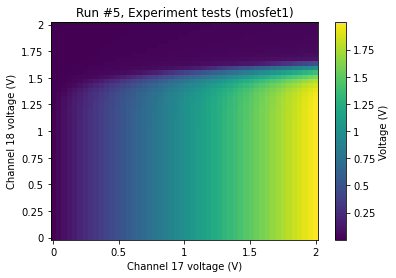

In [11]:
analyse.display_experiment_dataset(experiment_name ="tests", run_id=5)

In [ ]:
# analyser
#     experiments
#         datasets_in_experiments